# Step response of an overdamped second order linear system

The system has the transfer function
$$ G(s) = \frac{1}{(T_1s + 1)(T_2s+2)} $$
with two real-valued poles in $-\frac{1}{T_1}$ and $-\frac{1}{T_2}$. 

The response to a unit step is 
$$ y(t) = 1 + \frac{T_1}{T_2-T_1}\mathrm{e}^{-\frac{t}{T_2}} - \frac{T_2}{T_2-T_1}\mathrm{e}^{-\frac{t}{T_1}}. $$

In [1]:
using Interact
using ControlSystems
using Gadfly

    +(AbstractArray, DataArrays.DataArray) at /home/kjartan/.julia/v0.4/DataArrays/src/operators.jl:276
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /home/kjartan/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.DataArray{T<:Any, 2})
before the new definition.
    +(AbstractArray, DataArrays.AbstractDataArray) at /home/kjartan/.julia/v0.4/DataArrays/src/operators.jl:300
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /home/kjartan/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.AbstractDataArray{T<:Any, 2})
before the new definition.


Interact.Slider{Float64}(Signal{Float64}(2.1, nactions=0),"T1",2.1,0.2:0.1:4.0,".3f",true)

Interact.Slider{Float64}(Signal{Float64}(2.0, nactions=0),"T2",2.0,0.1:0.1:4.0,".3f",true)

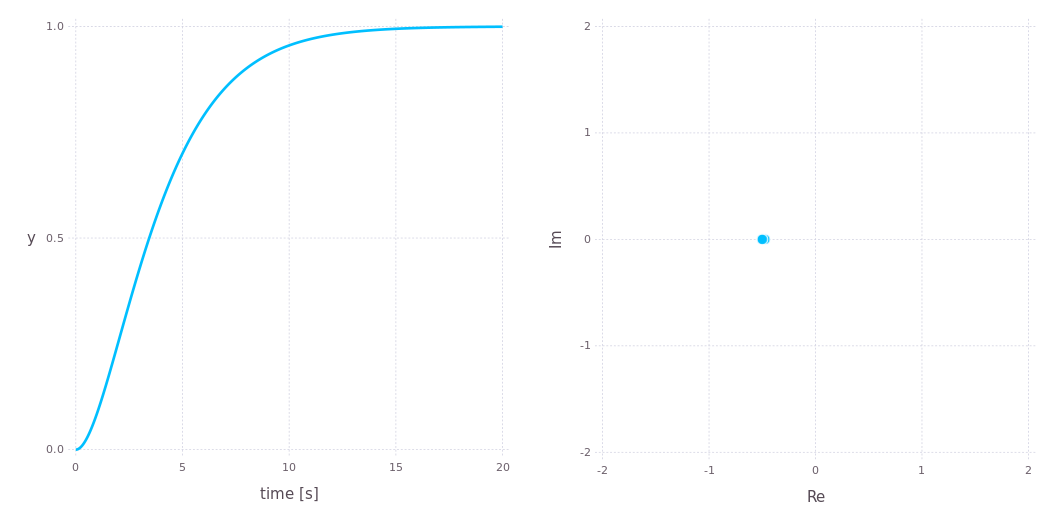

In [6]:
set_default_plot_size(28cm, 14cm)

N = 1200; # Number of samples

t = collect(linspace(0, 20, N)); # 60 values per second 

# The input step
u = ones(N);

@manipulate for T1 in 0.2:0.1:4.0, T2 in 0.1:0.1:4.0
    G = minreal(zpk([], [-1/T1, -1/T2], 1/T1/T2));
    yr, t_out, x = lsim(G, u, t);
    stp = plot(x=t, y=yr, Geom.line, Guide.xlabel("time [s]"), Guide.ylabel("y"), style(line_width=2pt))
    pp = plot(x = [-1/T1, -1/T2], y=[0,0], Geom.point, style(default_point_size=4pt),
    Guide.xlabel("Re"), Guide.ylabel("Im"), 
    Coord.cartesian(xmin=-2, xmax=2, ymin=-2, ymax=2, aspect_ratio=1))
    fig1 = hstack(stp, pp)

end